# Лабораторная работа 1 | Рылов А.Д М80-407Б-21

## 1. Выбор начальных условий


Для задачи регрессии взят [набор данных](https://www.kaggle.com/datasets/bilalabdulmalik/top-300-asian-universities-qs-rankings-2024) – датасет метрик университетов азиатских стран. Целевая метрика – столбец `Overall Score`. Соответственно, выбраны следующие метрики качества:

1. **Mean Absolute Error (MAE)** – среднее отклонение прогноза модели от истинного значения.
  
2. **Mean Squared Error (MSE)** – среднеквадратичная ошибка для выявления крупных отклонений в прогнозах.
   
3. **Root Mean Squared Error (RMSE)** – Корень из среднеквадратичной ошибки для сравнения с MAE.
   
4. **R-squared (R²)** – коэффициент детерминации для сравнения со средним значением

**Практическая ценность**: Выяснить, какие факторы оказывают наибольшее влияние на качество образования в университете.

Для задачи классификации взят [набор данных](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset) – датасет с характеристиками грибов (размеры шляпки, цвет ножки и тд). Целевой переменной является столбец `class`` (Poisonous or Not, т.е. ядовитый гриб или нет, True если ядовитый). Соответственно, выбраны следующие метрики качества::

1. **Accuracy** – Точность для оценки общей точности модели
2. **Precision** – Точность для положительного класса чтобы минимизировать ложные срабатывания
3. **Recall** – Полнота, для минимизации ложных отрицаний

4. **F1-score** – Среднее гармоническое Precision и Recall

**Практическая ценность**: модель, обученную на этом наборе данных могут использовать дроны-сборщики съедобных грибов (или, наоборот, ядовитых).

## 2.1	Создание бейзлайна (регрессия)

In [63]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

file_path = '/content/topuniversities.csv'
data = pd.read_csv(file_path)
data.head()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0
1,2,2,The University of Hong Kong,99.7,Pokfulam,Hong Kong,99.5,55.0,100.0,93.3,97.4,98.4,100.0,100.0,99.8,100.0,96.8
2,3,3,National University of Singapore (NUS),98.9,Singapore,Singapore,99.9,57.4,100.0,85.8,82.5,99.9,99.2,97.6,93.4,100.0,99.9
3,4,4,Nanyang Technological University,98.3,Singapore,Singapore,100.0,53.8,100.0,93.0,67.0,99.7,98.8,97.9,90.5,100.0,98.8
4,5,5,Fudan University,97.2,Shanghai,China,92.1,63.1,99.8,92.5,73.4,92.1,81.0,94.9,99.5,98.9,99.5


In [52]:
target = 'Overall Score'
features = [
    'Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
    'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
    'International Students', 'Outbound Exchange', 'Inbound Exchange',
    'International Faculty', 'Employer Reputation'
]

X = data[features]
y = data[target]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 4.342
Mean Squared Error (MSE): 31.956000000000007
Root Mean Squared Error (RMSE): 5.652963824402205
R-squared (R²): 0.9124152703375019


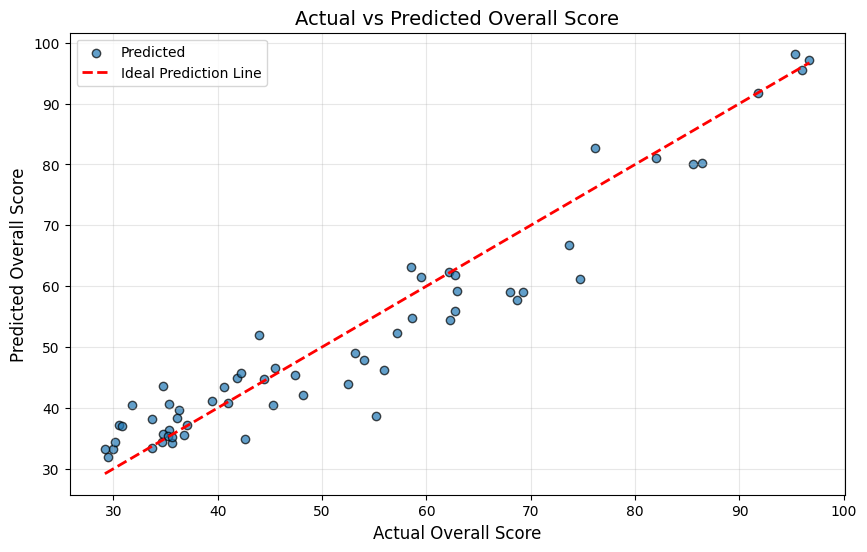

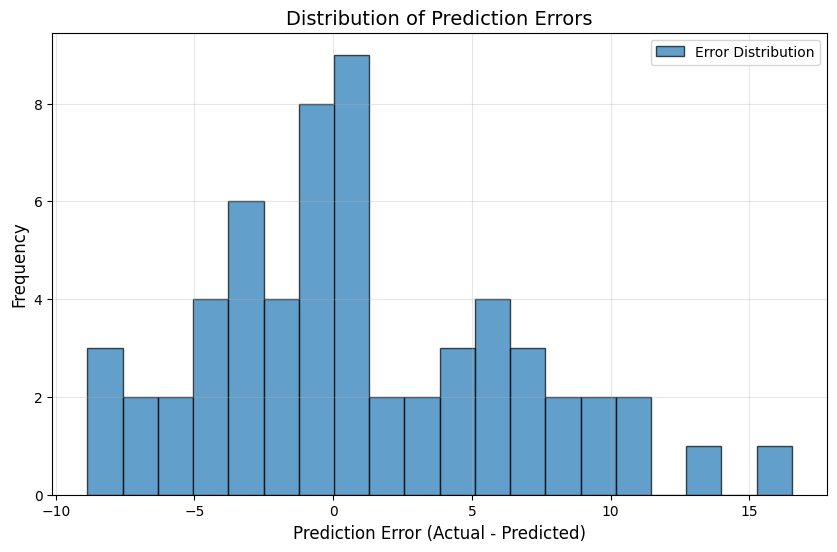

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Overall Score', fontsize=12)
plt.ylabel('Predicted Overall Score', fontsize=12)
plt.title('Actual vs Predicted Overall Score', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7, label='Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


## 3.1	Улучшение бейзлайна (регрессия)

### Как можно улучшить
+ Преобразовать категориальные значения в числовые с помощью One-Hot Encoding
+ Подобрать гиперпараметры
+ Масштабировать данные с помощью Scaler

In [54]:
target = 'Overall Score'
numerical_features = [
    'Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
    'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
    'International Students', 'Outbound Exchange', 'Inbound Exchange',
    'International Faculty', 'Employer Reputation'
]
categorical_features = ['City', 'Country']

X = data[numerical_features + categorical_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # !
])

# !
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# !
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Улучшенные параметры:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Улучшенные параметры: {'knn__metric': 'euclidean', 'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Mean Absolute Error (MAE): 3.9526637335912596
Mean Squared Error (MSE): 23.62406428357921
Root Mean Squared Error (RMSE): 4.860459266733876
R-squared (R²): 0.9352513680120553


## Сравнение результатов
|Метрика|Base Sklearn|Improved Sklearn|
|-|-|-|
|MAE|4.34|3.95|
|MSE|31.95|23.62|
|RMSE|5.65|4.86|
|R-squared|0.91|0.93|


## 4.1	Имплементация алгоритма машинного обучения (регрессия)

In [55]:
class KNNRegressor:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            # индексы ближайших соседей
            neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            # среднее значение у ближайших соседей
            neighbors_values = self.y_train[neighbors_indices]
            predictions.append(np.mean(neighbors_values))
        return np.array(predictions)


numerical_features = [
    'Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
    'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
    'International Students', 'Outbound Exchange', 'Inbound Exchange',
    'International Faculty', 'Employer Reputation'
]

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data[numerical_features])
y = data['Overall Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_custom = KNNRegressor(n_neighbors=5)
knn_custom.fit(X_train, y_train)

y_pred = knn_custom.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 4.342
Mean Squared Error (MSE): 31.956000000000007
Root Mean Squared Error (RMSE): 5.652963824402205
R-squared (R²): 0.9124152703375019


#### Метрики базовой реализации и кастомной полностью совпали


### Кастомная реализация с улучшенным бейзлайном

In [56]:
class KNNRegressor:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            # индексы ближайших соседей
            neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            # среднее значение у ближайших соседей
            neighbors_values = self.y_train[neighbors_indices]
            predictions.append(np.mean(neighbors_values))
        return np.array(predictions)

numerical_features = [
    'Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
    'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
    'International Students', 'Outbound Exchange', 'Inbound Exchange',
    'International Faculty', 'Employer Reputation'
]
categorical_features = ['City', 'Country']

data[categorical_features] = data[categorical_features].fillna('Unknown')

# !
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(data[categorical_features])

imputer = SimpleImputer(strategy='mean')
# !
scaler = StandardScaler()

X_num = imputer.fit_transform(data[numerical_features])
X_num = scaler.fit_transform(X_num)

X_combined = np.hstack([X_num, X_cat])
y = data['Overall Score']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

knn_custom = KNNRegressor(n_neighbors=7)
knn_custom.fit(X_train, y_train)

y_pred = knn_custom.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 3.863809523809526
Mean Squared Error (MSE): 25.26934693877553
Root Mean Squared Error (RMSE): 5.026862534302637
R-squared (R²): 0.9307419914763886


## Сравнение результатов

|Метрика|Improved Custom|Improved Sklearn|
|-|-|-|
|MAE|3.86|3.95|
|MSE|25.26|23.62|
|RMSE|5.02|4.86|
|R-squared|0.93|0.93|

#### Результаты примерно соотвествуют тому, что получилось с использованием sklearn. Возмножно, в библиотечной: реализации есть какие-либо дополнительные оптимизации или подобраны более удачные гиперпараметры

## 2.2	Создание бейзлайна (классификация)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier


file_path = '/content/mushroom_cleaned.csv'
data = pd.read_csv(file_path)
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [78]:
target = 'class'
features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
            'stem-height', 'stem-width', 'stem-color', 'season']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7163875266031277
Precision: 0.7417648062809353
Recall: 0.7368599525262801
F1-score: 0.7393042442800034


## 3.2	Улучшение бейзлайна (классификация)


### Как можно улучшить
+ Преобразовать категориальные значения в числовые с помощью LabelEncoder
+ Подобрать гиперпараметры
+ Масштабировать данные с помощью Scaler

In [108]:
target = 'class'
features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
            'stem-height', 'stem-width', 'stem-color', 'season']

X = data[features].copy()
y = data[target]

categorical_features = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']
label_encoders = {}
X_cat_encoded = pd.DataFrame()

# !
for col in categorical_features:
    le = LabelEncoder()
    X_cat_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

numerical_features = ['cap-diameter', 'stem-height', 'stem-width']
# !
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X[numerical_features].astype('float64')),
    columns=numerical_features
)

X_processed = pd.concat([X_num_scaled, X_cat_encoded], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9893587489590081
Precision: 0.9880168776371308
Recall: 0.9925398440149203
F1-score: 0.9902731963122727


## Сравнение результатов

|Метрика|Base|Improved|
|-|-|-|
|Accuracy|0.71|0.98|
|Precision|0.74|0.98|
|Recall|0.73|0.99|
|F1-score|0.73|0.99|


## 4.2	Имплементация алгоритма машинного обучения (классификация)

---



In [107]:
class KNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            neighbors_labels = self.y_train[neighbors_indices]

            most_common = Counter(neighbors_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)


target = 'class'
features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
            'stem-height', 'stem-width', 'stem-color', 'season']

X = data[features].copy()
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_custom = KNNClassifier(n_neighbors=5)
knn_custom.fit(X_train, y_train)

y_pred_custom = knn_custom.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

print("Accuracy:", accuracy_custom)
print("Precision:", precision_custom)
print("Recall:", recall_custom)
print("F1-score:", f1_custom)


Accuracy: 0.7163875266031277
Precision: 0.7417648062809353
Recall: 0.7368599525262801
F1-score: 0.7393042442800034


#### Метрики базовой реализации и кастомной полностью совпали


### Кастомная реализация с улучшенным бейзлайном

### Как можно улучшить
+ Добавить взвешивание по расстоянию в KNNClassifier

In [106]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class ImprovedKNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))

            neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            neighbors_labels = self.y_train[neighbors_indices]
            neighbors_distances = distances[neighbors_indices]

            # взвешенное голосование
            weights = 1 / (neighbors_distances + 1e-5)  # чтобы не делить на 0
            label_weights = Counter()
            for label, weight in zip(neighbors_labels, weights):
                label_weights[label] += weight
            predictions.append(label_weights.most_common(1)[0][0])
        return np.array(predictions)


improved_knn = ImprovedKNNClassifier(n_neighbors=5)
improved_knn.fit(X_train, y_train)

y_pred_improved = improved_knn.predict(X_test)

accuracy_improved = accuracy_score(y_test, y_pred_improved)
precision_improved = precision_score(y_test, y_pred_improved)
recall_improved = recall_score(y_test, y_pred_improved)
f1_improved = f1_score(y_test, y_pred_improved)

print("Accuracy:", accuracy_improved)
print("Precision:", precision_improved)
print("Recall:", recall_improved)
print("F1-score:", f1_improved)


Accuracy: 0.9897288794299991
Precision: 0.9881896406276363
Recall: 0.993048491013903
F1-score: 0.9906131078224102


|Метрика|Sklearn improved|Custom Improved|
|-|-|-|
|Accuracy|0.9893|0.9872|
|Precision|0.9880|0.9881|
|Recall|0.9925|0.9930|
|F1-score|0.9902|0.9906|

#### Метрики примерно соотвествуют тому, что получилось с использованием sklearn. В целом результаты показывают, что как собственная имплементация, так и использование стандартных библиотек, таких как sklearn, приводят к аналогичным высоким результатам, если применить те же улучшения.